In [1]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt

from tqdm import tqdm


In [2]:
# pip install tqdm

In [11]:
DATA_DIR = "../data/raw/english/"
OUTPUT_CSV = "../features/english_features.csv"

In [4]:
emotion_map = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

def parse_emotion(filename):
    parts = filename.split('-')
    emotion_code = parts[2]
    return emotion_map.get(emotion_code, 'unknown')


In [5]:
def extract_features(file_path, sr=22050):
    y, sr = librosa.load(file_path, sr=sr)
    y, _ = librosa.effects.trim(y)
    y = y / np.max(np.abs(y))
    
    feats = []
    
    # MFCC
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    feats.extend(mfccs.mean(axis=1))
    feats.extend(mfccs.std(axis=1))
    
    # Chroma
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    feats.extend(chroma.mean(axis=1))
    feats.extend(chroma.std(axis=1))
    
    # Spectral Contrast
    spec_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    feats.extend(spec_contrast.mean(axis=1))
    feats.extend(spec_contrast.std(axis=1))
    
    # Tonnetz
    tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr)
    feats.extend(tonnetz.mean(axis=1))
    feats.extend(tonnetz.std(axis=1))
    
    # Zero-Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(y)
    feats.append(zcr.mean())
    feats.append(zcr.std())
    
    return np.array(feats)

In [6]:
all_files = []
for root, dirs, files in os.walk(DATA_DIR):
    for file in files:
        if file.endswith(".wav"):
            full_path = os.path.join(root, file)
            emotion = parse_emotion(file)
            all_files.append((full_path, emotion))

print(f"Found {len(all_files)} files")


Found 1440 files


In [ ]:
# pip install ipywidgets

In [7]:
# Always clear these before you loop
feature_list = []
label_list = []
file_list = []


In [8]:
for path, label in tqdm(all_files):
    try:
        feats = extract_features(path)
        feature_list.append(feats)
        label_list.append(label)
        file_list.append(os.path.basename(path))
    except Exception as e:
        print(f"Error processing {path}: {e}")


  0%|          | 0/1440 [00:00<?, ?it/s]D:\2.IDEs\Miniconda\envs\EmRec\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=736
  warnings.warn(
  0%|          | 1/1440 [00:03<1:32:53,  3.87s/it]D:\2.IDEs\Miniconda\envs\EmRec\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=918
  warnings.warn(
  0%|          | 2/1440 [00:04<43:10,  1.80s/it]  D:\2.IDEs\Miniconda\envs\EmRec\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=928
  warnings.warn(
  0%|          | 3/1440 [00:04<25:56,  1.08s/it]D:\2.IDEs\Miniconda\envs\EmRec\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=816
  warnings.warn(
  1%|▏         | 20/1440 [00:09<06:25,  3.69it/s]D:\2.IDEs\Miniconda\envs\EmRec\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is t

In [9]:
num_features = feature_list[0].shape[0]
columns = [f'feat_{i}' for i in range(num_features)]

df = pd.DataFrame(feature_list, columns=columns)
df['label'] = label_list
df['filename'] = file_list

df.head()


,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,label,filename
0,-298.425720,83.993355,0.615803,18.726774,11.506062,0.444444,-5.304434,-5.198843,-17.204596,-4.686177,...,0.054887,0.062510,0.109044,0.122098,0.041411,0.037959,0.264360,0.252552,neutral,03-01-01-01-01-01-01.wav
1,-333.286255,74.349396,-12.544933,11.383206,-5.878460,-5.228570,-7.164822,-11.703046,-5.417029,-1.097152,...,0.108410,0.067343,0.144316,0.140923,0.049392,0.050772,0.264793,0.218781,neutral,03-01-01-01-01-01-02.wav
2,-306.616089,72.211823,-3.426069,13.557590,5.396300,-3.151230,-15.329295,-8.475698,-4.016462,-10.860439,...,0.092157,0.062452,0.094434,0.172354,0.043159,0.053479,0.223554,0.180845,neutral,03-01-01-01-01-01-03.wav
3,-317.964935,59.413216,-10.204085,12.441605,-5.781204,-6.836335,-9.086070,-17.597017,-10.113615,-4.942062,...,0.105741,0.124205,0.159109,0.197952,0.058515,0.071375,0.310239,0.275152,neutral,03-01-01-01-01-01-04.wav
4,-391.550323,68.360939,7.989172,15.139792,11.715776,0.430984,1.002559,-2.773119,-0.127346,1.893249,...,0.074585,0.088876,0.097363,0.163048,0.040677,0.043596,0.250783,0.189552,neutral,03-01-01-01-01-01-05.wav


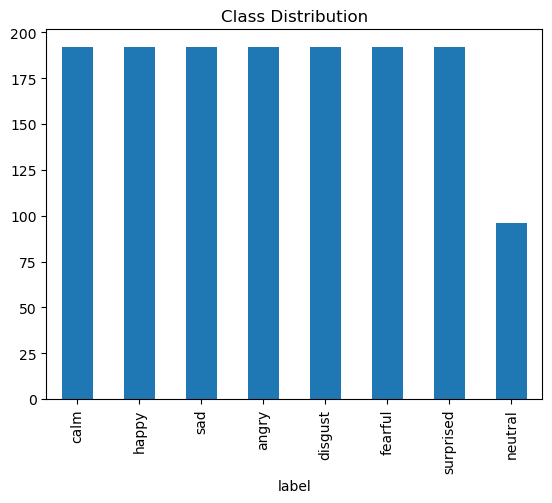

In [10]:
df['label'].value_counts().plot(kind='bar', title='Class Distribution')
plt.show()


In [20]:
new_columns = []
for i in range(13):
    new_columns.append(f"MFCC_mean_{i}")
for i in range(13):
    new_columns.append(f"MFCC_std_{i}")
for i in range(12):
    new_columns.append(f"Chroma_mean_{i}")
for i in range(12):
    new_columns.append(f"Chroma_std_{i}")
for i in range(7):
    new_columns.append(f"SpectralContrast_mean_{i}")
for i in range(7):
    new_columns.append(f"SpectralContrast_std_{i}")
for i in range(6):
    new_columns.append(f"Tonnetz_mean_{i}")
for i in range(6):
    new_columns.append(f"Tonnetz_std_{i}")
new_columns.append("ZCR_mean")
new_columns.append("ZCR_std")

In [21]:
feature_cols = [col for col in df.columns if col.startswith("feat_")]
rename_dict = {old: new for old, new in zip(feature_cols, new_columns)}
df = df.rename(columns=rename_dict)

In [22]:
os.makedirs("../features", exist_ok=True)
df.to_csv(OUTPUT_CSV, index=False)
print(f"Saved features to {OUTPUT_CSV}")


Saved features to ../features/english_features.csv


In [17]:
df.head()

,MFCC_mean_0,MFCC_mean_1,MFCC_mean_2,MFCC_mean_3,MFCC_mean_4,MFCC_mean_5,MFCC_mean_6,MFCC_mean_7,MFCC_mean_8,MFCC_mean_9,...,Tonnetz_std_0,Tonnetz_std_1,Tonnetz_std_2,Tonnetz_std_3,Tonnetz_std_4,Tonnetz_std_5,ZCR_mean,ZCR_std,label,filename
0,-298.425720,83.993355,0.615803,18.726774,11.506062,0.444444,-5.304434,-5.198843,-17.204596,-4.686177,...,0.054887,0.062510,0.109044,0.122098,0.041411,0.037959,0.264360,0.252552,neutral,03-01-01-01-01-01-01.wav
1,-333.286255,74.349396,-12.544933,11.383206,-5.878460,-5.228570,-7.164822,-11.703046,-5.417029,-1.097152,...,0.108410,0.067343,0.144316,0.140923,0.049392,0.050772,0.264793,0.218781,neutral,03-01-01-01-01-01-02.wav
2,-306.616089,72.211823,-3.426069,13.557590,5.396300,-3.151230,-15.329295,-8.475698,-4.016462,-10.860439,...,0.092157,0.062452,0.094434,0.172354,0.043159,0.053479,0.223554,0.180845,neutral,03-01-01-01-01-01-03.wav
3,-317.964935,59.413216,-10.204085,12.441605,-5.781204,-6.836335,-9.086070,-17.597017,-10.113615,-4.942062,...,0.105741,0.124205,0.159109,0.197952,0.058515,0.071375,0.310239,0.275152,neutral,03-01-01-01-01-01-04.wav
4,-391.550323,68.360939,7.989172,15.139792,11.715776,0.430984,1.002559,-2.773119,-0.127346,1.893249,...,0.074585,0.088876,0.097363,0.163048,0.040677,0.043596,0.250783,0.189552,neutral,03-01-01-01-01-01-05.wav


<Axes: title={'center': 'Emotion Class Distribution'}, xlabel='label'>

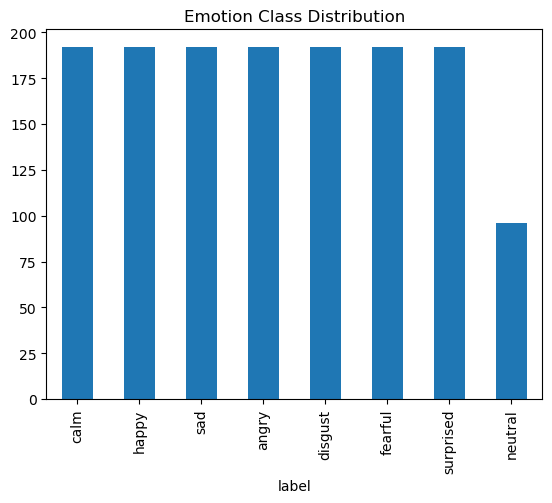

In [23]:
df['label'].value_counts().plot(kind='bar', title='Emotion Class Distribution')


In [29]:
df1.describe().T


,count,mean,std,min,25%,50%,75%,max
MFCC_mean_0,1440.0,-314.619823,49.958903,-430.162415,-350.667328,-317.884644,-278.640495,-175.237137
MFCC_mean_1,1440.0,58.754606,17.087891,-10.795923,48.390920,59.540077,69.781700,116.051102
MFCC_mean_2,1440.0,-8.505155,16.518479,-68.033447,-18.507924,-6.498185,3.417835,28.183119
MFCC_mean_3,1440.0,8.291753,9.106674,-35.719406,2.793743,9.087850,14.553217,33.561005
MFCC_mean_4,1440.0,-0.679801,11.117422,-39.721626,-8.103818,0.521156,8.003688,22.148632
...,...,...,...,...,...,...,...,...
Tonnetz_std_3,1440.0,0.148729,0.041362,0.057659,0.118884,0.142948,0.173593,0.313614
Tonnetz_std_4,1440.0,0.052537,0.015671,0.019382,0.040804,0.050822,0.062083,0.122209
Tonnetz_std_5,1440.0,0.051947,0.015551,0.018461,0.040228,0.050213,0.061778,0.111228
ZCR_mean,1440.0,0.207183,0.061810,0.062295,0.161172,0.199623,0.247898,0.416755


In [26]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


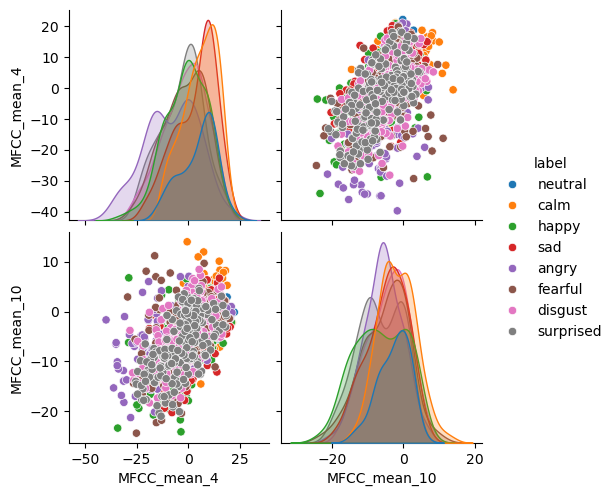

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df1, vars=["MFCC_mean_0", "MFCC_mean_1"], hue="label")
plt.show()


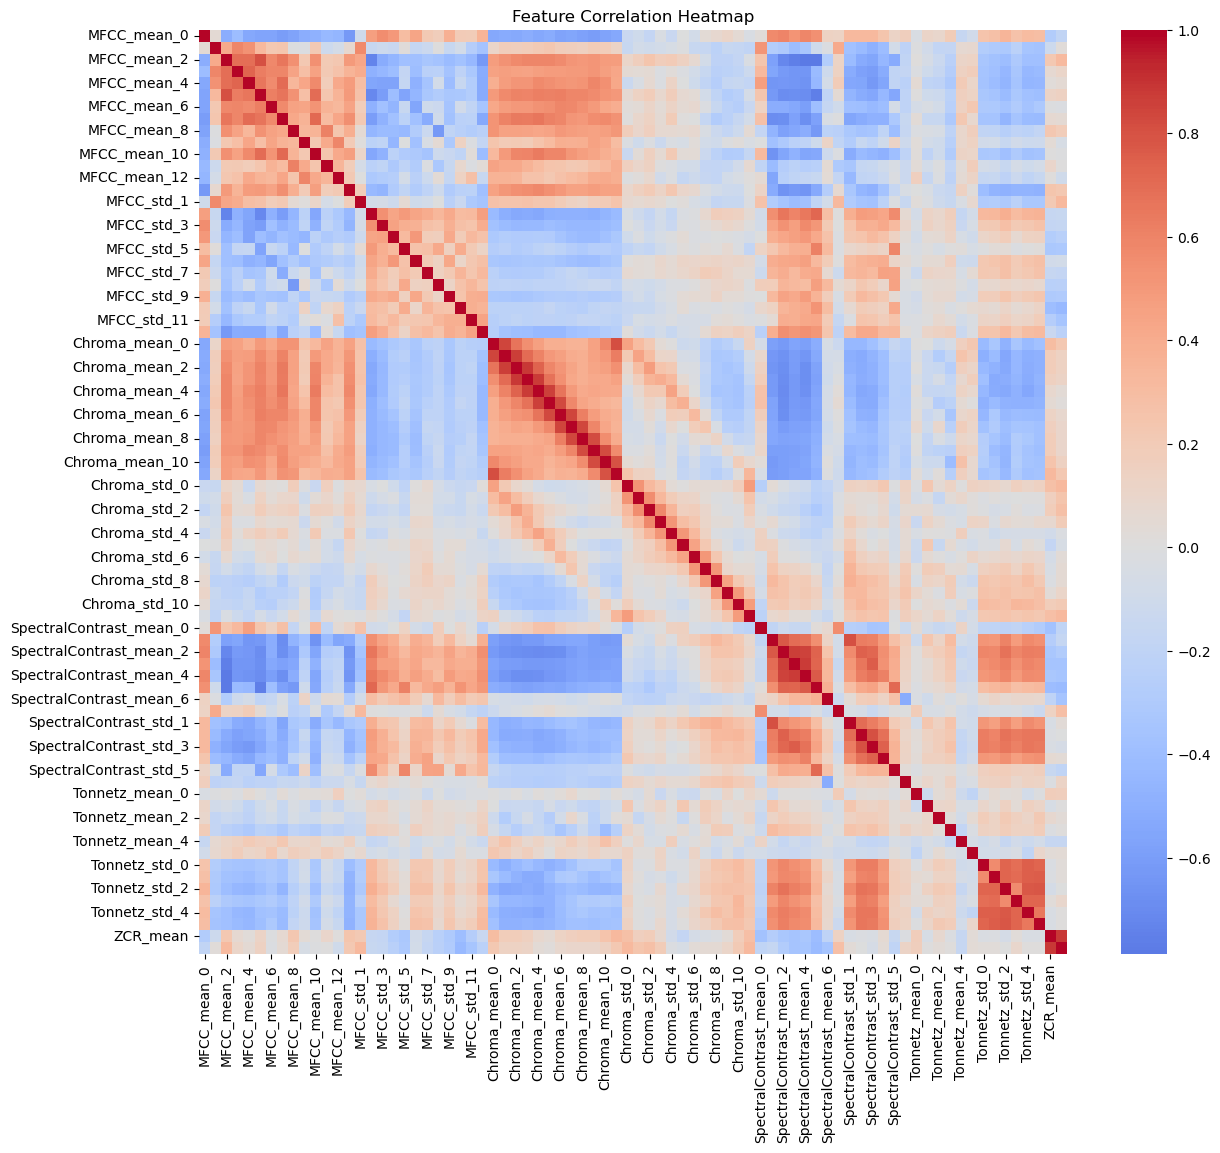

In [33]:
import numpy as np

plt.figure(figsize=(14, 12))
corr = df1.drop(columns=['label', 'filename']).corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()


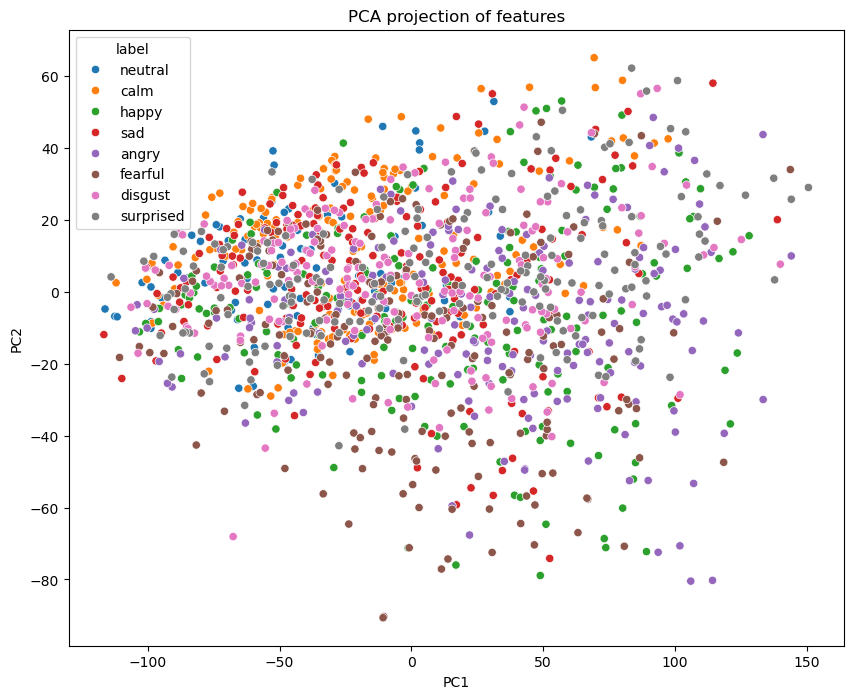

In [34]:
from sklearn.decomposition import PCA

features = df1.drop(columns=['label', 'filename'])
pca = PCA(n_components=2)
components = pca.fit_transform(features)

df_pca = pd.DataFrame(components, columns=['PC1', 'PC2'])
df_pca['label'] = df1['label']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='label', data=df_pca, palette='tab10')
plt.title('PCA projection of features')
plt.show()


<Axes: xlabel='PC1', ylabel='PC2'>

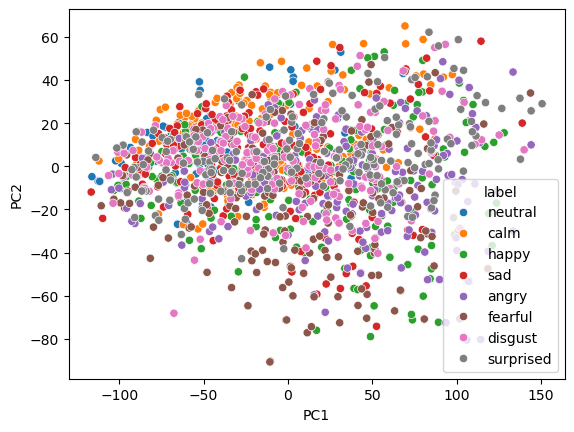

In [35]:
sns.scatterplot(x='PC1', y='PC2', hue='label', data=df_pca)


In [13]:
# df1 = pd.read_csv("../features/english_features.csv")

# # Build new names
# new_columns = []
# for i in range(13):
#     new_columns.append(f"MFCC_mean_{i}")
# for i in range(13):
#     new_columns.append(f"MFCC_std_{i}")
# for i in range(12):
#     new_columns.append(f"Chroma_mean_{i}")
# for i in range(12):
#     new_columns.append(f"Chroma_std_{i}")
# for i in range(7):
#     new_columns.append(f"SpectralContrast_mean_{i}")
# for i in range(7):
#     new_columns.append(f"SpectralContrast_std_{i}")
# for i in range(6):
#     new_columns.append(f"Tonnetz_mean_{i}")
# for i in range(6):
#     new_columns.append(f"Tonnetz_std_{i}")
# new_columns.append("ZCR_mean")
# new_columns.append("ZCR_std")

In [14]:
# feature_cols = [col for col in df1.columns if col.startswith("feat_")]
# rename_dict = {old: new for old, new in zip(feature_cols, new_columns)}
# df1 = df1.rename(columns=rename_dict)

In [19]:
# df1.to_csv("../features/english_features.csv", index=False)
# print("Saved with descriptive feature names!")

Saved with descriptive feature names!
